In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Dataset .csv")
data.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [5]:
data.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [7]:
columns_to_convert = [ 'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu']

for col in columns_to_convert:
    data[col] = data[col].str.lower()
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Print updated data to verify
print(data[columns_to_convert].head())

   Has Table booking  Has Online delivery  Is delivering now  \
0                  1                    0                  0   
1                  1                    0                  0   
2                  1                    0                  0   
3                  0                    0                  0   
4                  1                    0                  0   

   Switch to order menu  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [76]:
filtered_data = data[(data['Has Table booking'] == 1) & (data['Has Online delivery']== 1)]

filtered_data[['Has Table booking','Has Online delivery']].head(3)

,Has Table booking,Has Online delivery
566,1,1
571,1,1
572,1,1


In [33]:
X = data[['Average Cost for two','Price range','Has Table booking','Has Online delivery','Votes']]
y = data['Aggregate rating']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y ,test_size =0.2 ,random_state=42)

reg = LinearRegression()
fitting_lr  = reg.fit(X_train ,y_train)
y_pred_lr = reg.predict(X_test)

In [37]:
y_pred_lr

array([1.92429177, 3.25134479, 2.56689543, ..., 2.54933362, 3.42272386,
       3.48435707])

In [38]:
X = sm.add_constant(X_scaled)

results = sm.OLS(y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Aggregate rating   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     681.1
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:18:19   Log-Likelihood:                -16071.
No. Observations:                9551   AIC:                         3.215e+04
Df Residuals:                    9545   BIC:                         3.220e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6664      0.013    200.116      0.000       2.640       2.692
x1             0.0206      0.013      1.536      0.125      -0.006       0.047
x2             0.5971      0.016     37.304      0.000       0.566       0.629
x3            -0.0885      0.015     -5.729      0.000      -0.119      -0.058
x4             0.2840      0.013     21.159      0.000       0.258       0.310
x5             0.2834      0.014     20.170      0.000       0.256       0.311
==============================================================================
Omnibus:                      968.724   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.683
Skew:                          -0.673   Prob(JB):                    3.51e-192
Kurtosis:                       2.364   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
yhat = np.dot(X_test, reg.coef_) + reg.intercept_

comparison_df = pd.DataFrame({'Actual value':y_test , 'Predicted value':y_pred_lr})

comparison_df['Difference'] = comparison_df['Actual value'] - comparison_df['Predicted value']

print(comparison_df.head())

      Actual value  Predicted value  Difference
4731           2.1         1.924292    0.175708
1468           4.1         3.251345    0.848655
9037           3.2         2.566895    0.633105
7866           4.4         2.649365    1.750635
5570           3.5         1.897450    1.602550


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Linear regression:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Linear regression:
Mean Absolute Error (MAE): 1.08
R-squared (R2): 0.26


In [63]:
dt_reg = DecisionTreeRegressor()
fitting_dt = dt_reg.fit(X_train,y_train)
y_pred_dt = dt_reg.predict(X_test)

y_pred_dt

array([2.4       , 3.66666667, 3.6       , ..., 3.14      , 3.7       ,
       4.1       ])

In [78]:
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print('Decision Tree:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Decision Tree:
Mean Absolute Error (MAE): 0.29
R-squared (R2): 0.91


In [65]:
rf_reg = RandomForestRegressor()
fitting_rf = rf_reg.fit(X_train,y_train)
y_pred_rf = rf_reg.predict(X_test)

y_pred_rf

array([2.81816667, 3.66500238, 3.2243    , ..., 3.13736717, 3.901     ,
       4.14      ])

In [79]:
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print('Rando forest regressor:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Rando forest regressor:
Mean Absolute Error (MAE): 0.24
R-squared (R2): 0.94


In [81]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

metrics = {
    'Model': [],
    'Mean Absolute Error (MAE)': [],
    'R-squared (R2)': []
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Mean Absolute Error (MAE)'].append(mae)
    metrics['R-squared (R2)'].append(r2)

# Create DataFrame
metrics_df[['Model','Mean Absolute Error (MAE)','R-squared (R2)']] = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df[['Model','Mean Absolute Error (MAE)','R-squared (R2)']]

,Model,Mean Absolute Error (MAE),R-squared (R2)
0,Linear Regression,1.075071,0.263445
1,Decision Tree,0.289934,0.907284
2,Random Forest,0.235881,0.942160


In [83]:
data[['Cuisines' , 'Aggregate rating']].head(5)

,Cuisines,Aggregate rating
0,"French, Japanese, Desserts",4.8
1,Japanese,4.5
2,"Seafood, Asian, Filipino, Indian",4.4
3,"Japanese, Sushi",4.9
4,"Japanese, Korean",4.8


In [89]:
top_cuisines = data['Cuisines'].value_counts().head(20)
top_cuisines_df = pd.DataFrame(top_cuisines)
top_cuisines_df

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


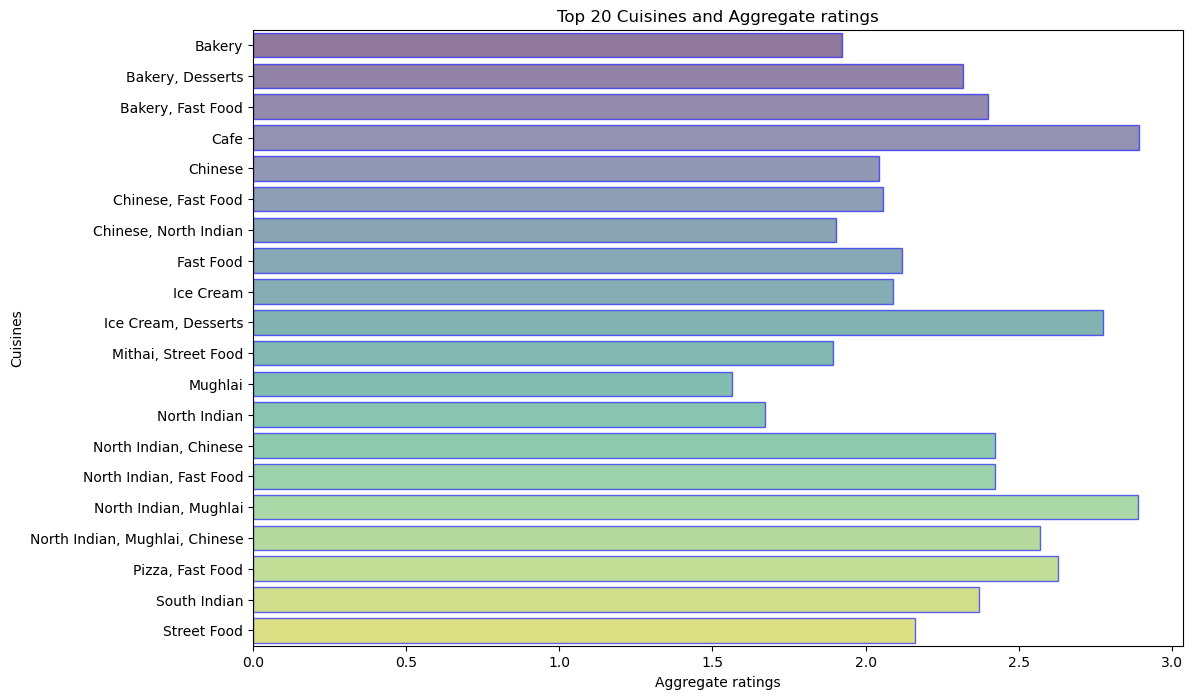

In [141]:
top_cuisines = data['Cuisines'].value_counts().head(20).index

filtered_data = data[data['Cuisines'].isin(top_cuisines)]

cuisine_ratings = filtered_data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x= 'Aggregate rating', y = 'Cuisines' , data = cuisine_ratings, palette='viridis' , alpha = 0.595 , edgecolor = 'blue')
plt.xlabel('Aggregate ratings')
plt.ylabel('Cuisines')
plt.title('Top 20 Cuisines and Aggregate ratings')
plt.show()

In [108]:
data[['Cuisines','Votes']].head(5)

,Cuisines,Votes
0,"French, Japanese, Desserts",314
1,Japanese,591
2,"Seafood, Asian, Filipino, Indian",270
3,"Japanese, Sushi",365
4,"Japanese, Korean",229


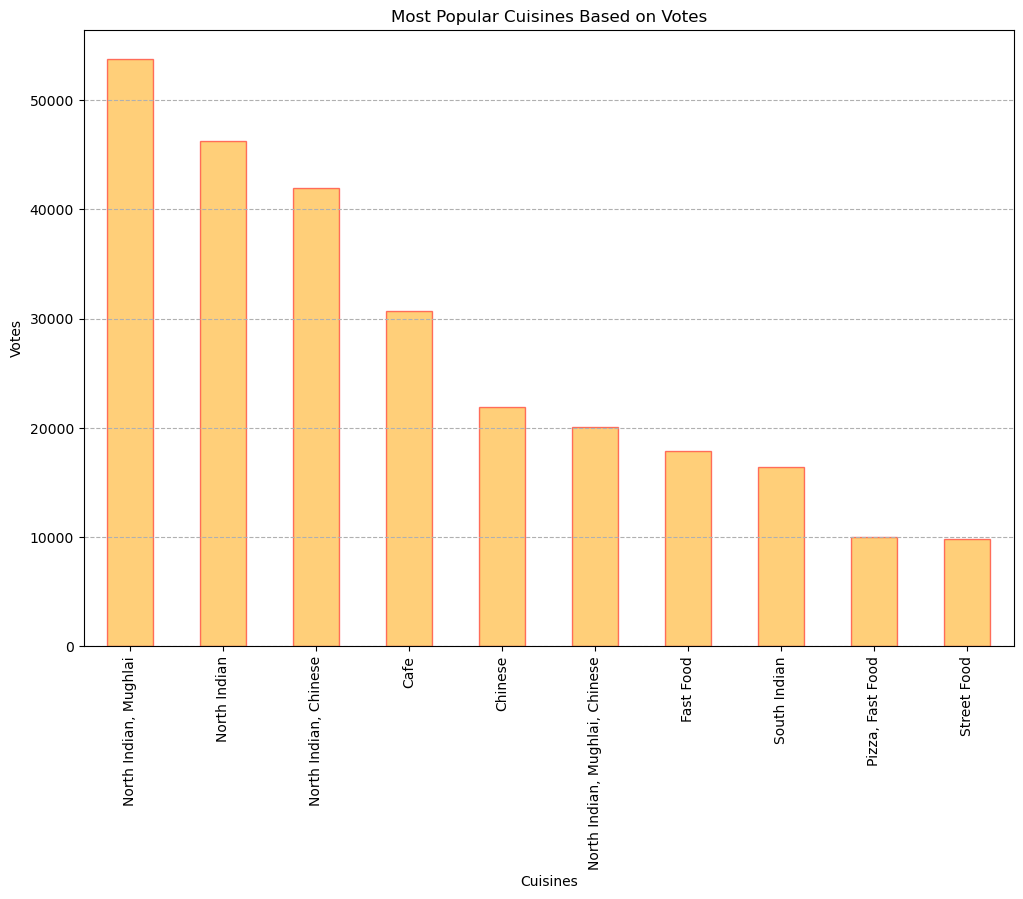

In [138]:
top_cuisines = data['Cuisines'].value_counts().head(20).index

filtered_data = data[data['Cuisines'].isin(top_cuisines)]

cuisine_votes_sum = filtered_data.groupby('Cuisines')['Votes'].sum()

most_pop_cuisines = cuisine_votes_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
most_pop_cuisines.head(10).plot(kind='bar', color='orange' ,alpha = 0.524  , edgecolor = 'red')
plt.xlabel('Cuisines')
plt.ylabel('Votes')
plt.title('Most Popular Cuisines Based on Votes')
plt.grid(axis= 'y' , linestyle ='--')
plt.show()

In [150]:
cuisines_ratings = data.groupby('Cuisines')['Aggregate rating'].mean()

sort_cuisines_ratings = cuisines_ratings.sort_values(ascending=False)

top_cuisines_ratings = sort_cuisines_ratings.head(10)

top_cuisines_ratings_df = pd.DataFrame(top_cuisines_ratings)

top_cuisines_ratings_df



,Aggregate rating
Cuisines,
"Italian, Deli",4.9
"Hawaiian, Seafood",4.9
"American, Sandwich, Tea",4.9
"Continental, Indian",4.9
"European, Asian, Indian",4.9
"European, Contemporary",4.9
"European, German",4.9
"BBQ, Breakfast, Southern",4.9
"American, Coffee and Tea",4.9


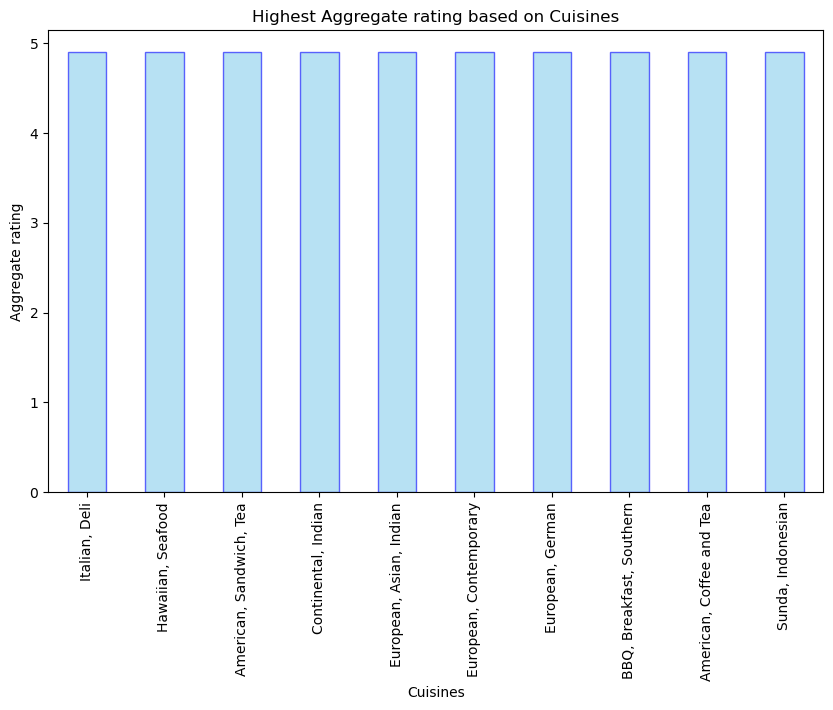

In [171]:
plt.figure(figsize=(10, 6))
top_cuisines_ratings.head(10).plot(kind = 'bar' , color = 'skyblue' , alpha = 0.596 , edgecolor = 'blue')
plt.xlabel('Cuisines')
plt.ylabel('Aggregate rating')
plt.title('Highest Aggregate rating based on Cuisines')
plt.show()

In [179]:
data.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

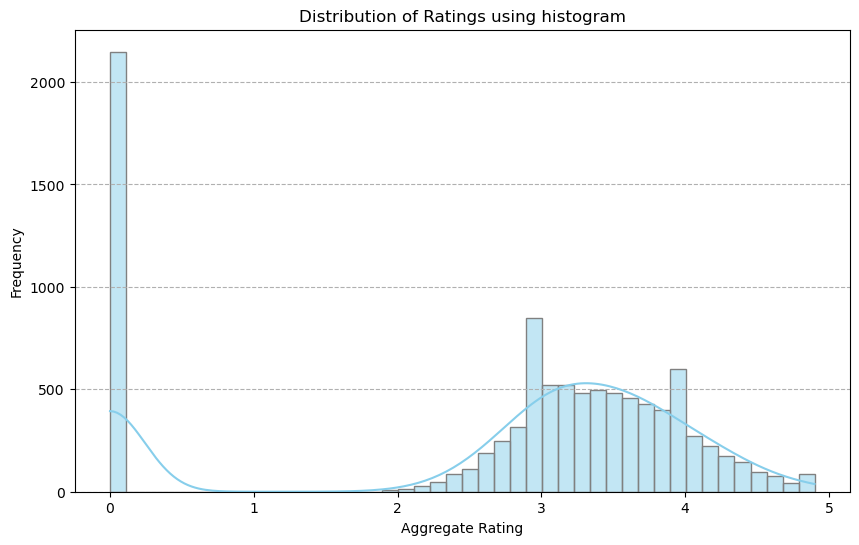

In [203]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Aggregate rating', kde=True, color='skyblue', alpha=0.5 , edgecolor = 'grey')
plt.title('Distribution of Ratings using histogram')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y' ,  linestyle = '--')
plt.show()

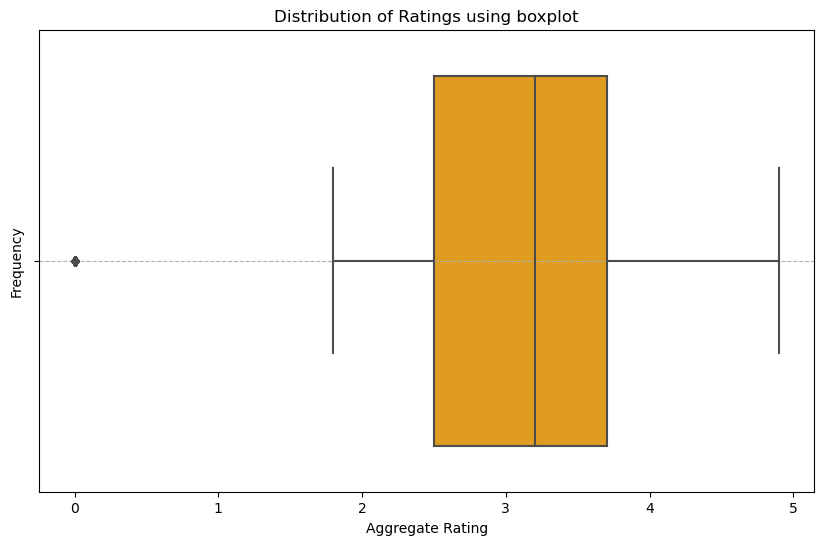

In [208]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Aggregate rating', color = 'orange')
plt.title('Distribution of Ratings using boxplot')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y' ,  linestyle = '--')
plt.show()

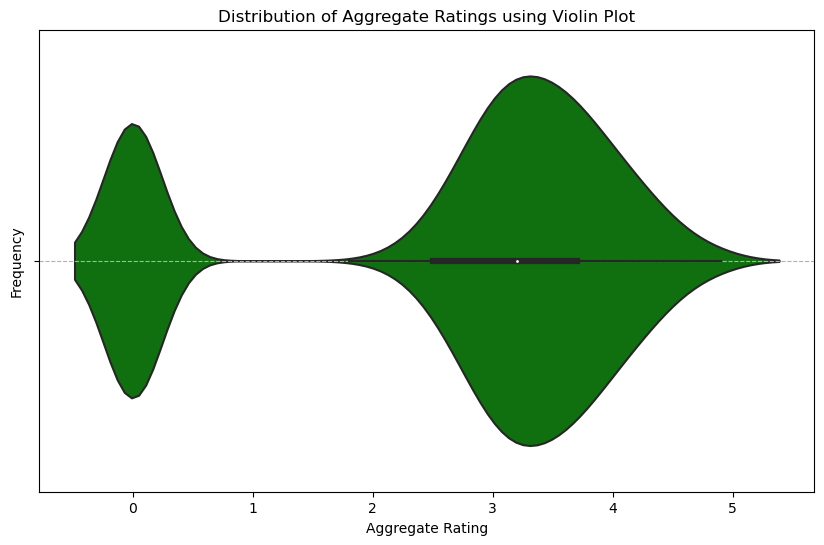

In [224]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Aggregate rating', color='green' )
plt.title('Distribution of Aggregate Ratings using Violin Plot')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y' , linestyle ='--')
plt.show()

In [247]:
top_cuisines = data['Cuisines'].value_counts().head(10).index

filtered_data = data[data['Cuisines'].isin(top_cuisines)]

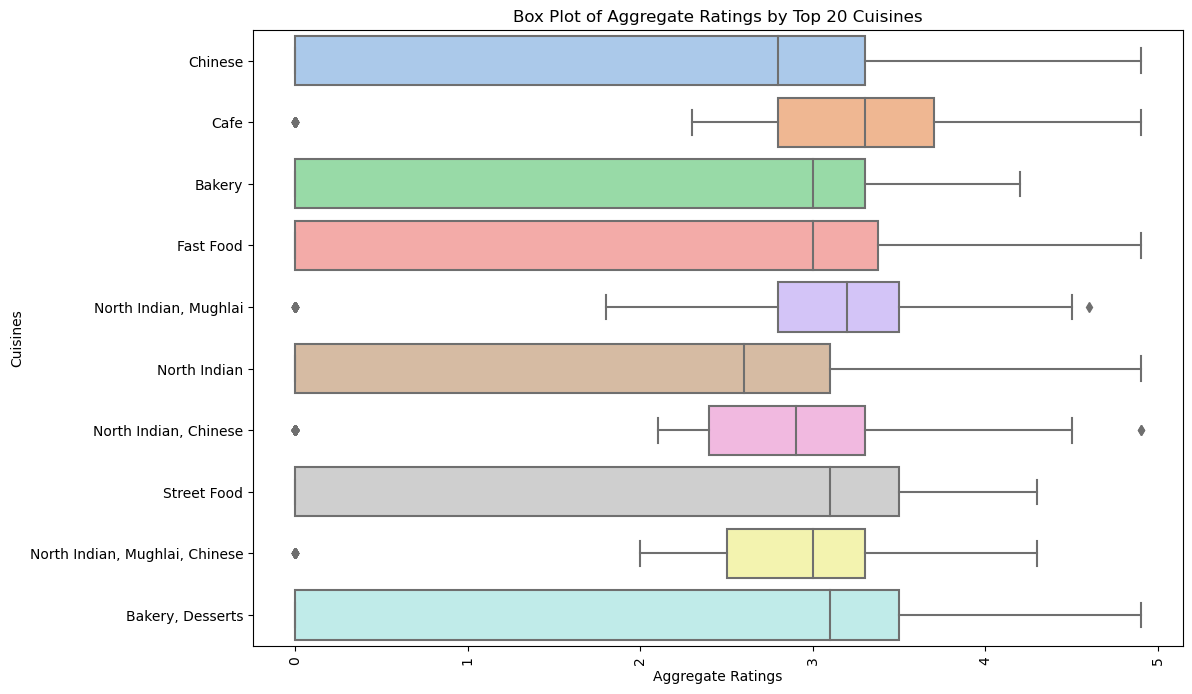

In [249]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='Aggregate rating', y='Cuisines', palette='pastel')
plt.xlabel('Aggregate Ratings')
plt.ylabel('Cuisines')
plt.title('Box Plot of Aggregate Ratings by Top 20 Cuisines')
plt.xticks(rotation=90)
plt.show()


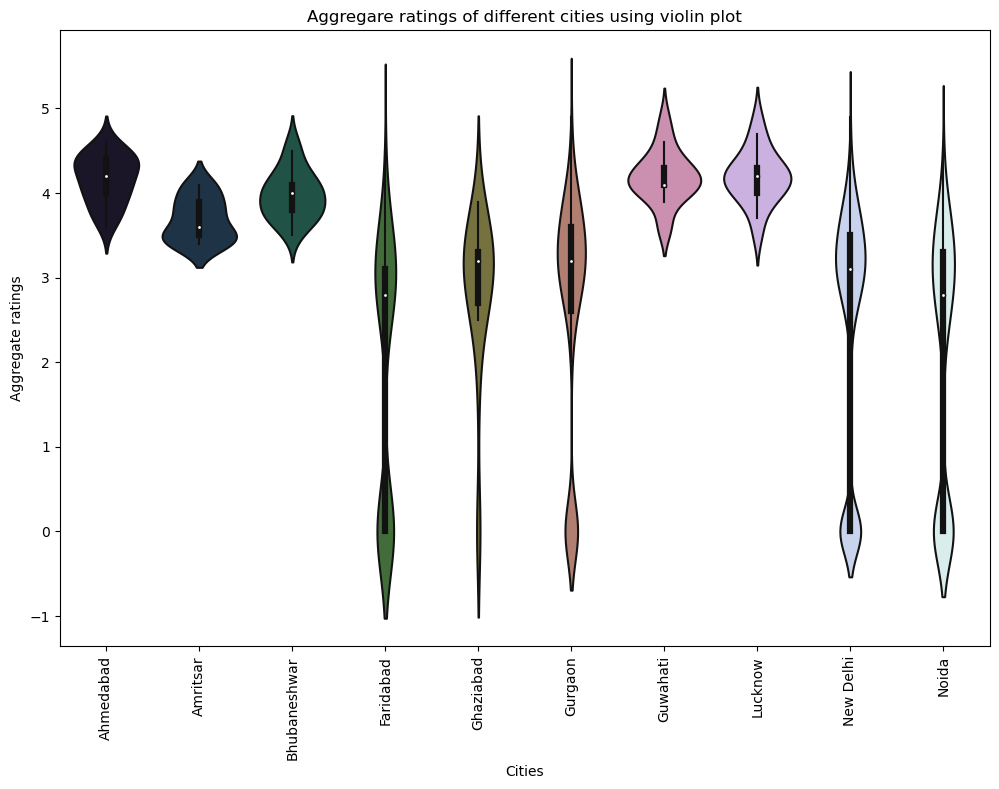

In [266]:

top_10_cities = data['City'].value_counts().head(10).index

filtered_cities = data[data['City'].isin(top_10_cities)]



plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_cities , x= 'City', y='Aggregate rating', palette='cubehelix')
plt.xlabel('Cities')
plt.ylabel('Aggregate ratings')
plt.title('Aggregare ratings of different cities using violin plot')
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x800 with 0 Axes>

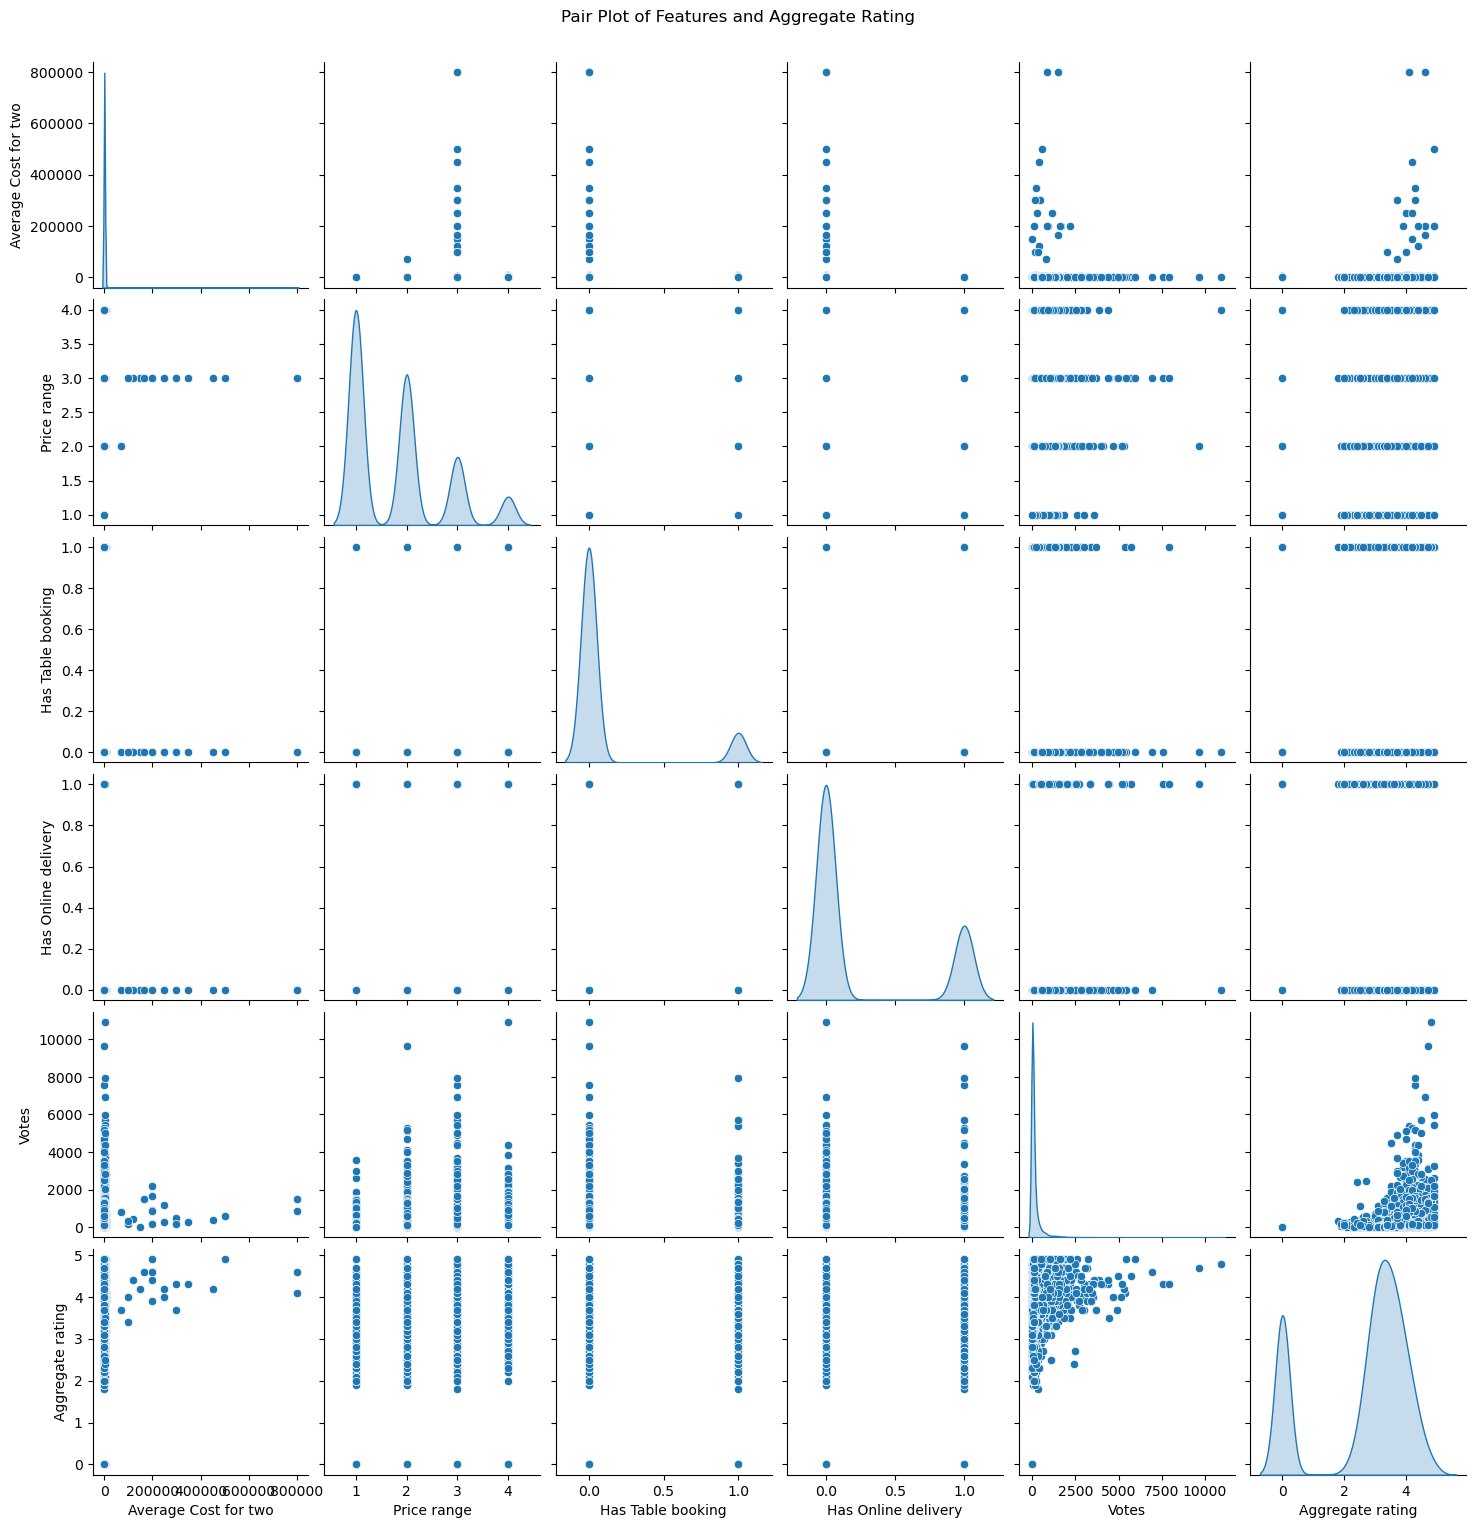

In [272]:
import warnings
warnings.filterwarnings('ignore')

features = ['Average Cost for two','Price range','Has Table booking','Has Online delivery','Votes', 'Aggregate rating']
data_subset = data[features]

plt.figure(figsize=(12, 8))
sns.pairplot(data_subset, diag_kind='kde')
plt.suptitle('Pair Plot of Features and Aggregate Rating', y=1.02)
plt.show()